Calculate flux dependence on zenith and/or atmosphere
-----------------------------------------------------

This notebook creates *Figure 5* from the proceedings. Since there some more calculations involved it will take more time - up to tens of minutes depending on your hardware.

If running for the first time, a cache file will be created to store the interpolation parameters for the integrated density profiles. The second run will use the cache and run much quicker.

Note: When using the **native** Python interface to NRLMSISE-00, the depth integration is **extremely slow** (1-3 minutes). Use the ctypes option in mceq_config.py for the C version. Go to c-NRLMSISE-00 folder and run ``make`` beforehand.

In [1]:
#import the usual modules
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
from os.path import join
os.chdir('..')
import matplotlib.pyplot as plt
import numpy as np

from MCEq.core import MCEqRun
import CRFluxModels as pm
from mceq_config import mceq_config_without

Initialize the `mceq_run` object
--------------------------------

In [2]:
mceq_run = MCEqRun(

interaction_model='SIBYLL2.3c',

primary_model=(pm.HillasGaisser2012, "H3a"),

theta_deg=0.,
density_model=None,

#Exclude the atmopheric setting from the configuration file
**mceq_config_without(['density_model'])

)

InteractionYields::_load(): Looking for /afs/ifh.de/group/that/work-af/git/MCEq/data/SIBYLL23C_yields_compact_ledpm.bz2
convert_to_compact(): Low energy extension requested /afs/ifh.de/group/that/work-af/git/MCEq/data/SIBYLL23C_yields_compact_ledpm.bz2
convert_to_compact(): Attempting conversion of /afs/ifh.de/group/that/work-af/git/MCEq/data/DPMJETIII20171_yields.bz2
DecayYields:_load():: Loading file /afs/ifh.de/group/that/work-af/git/MCEq/data/decays_v1.ppd
convert_to_compact(): Attempting conversion of /afs/ifh.de/group/that/work-af/git/MCEq/data/SIBYLL23C_yields.bz2
DecayYields:_load():: Loading file /afs/ifh.de/group/that/work-af/git/MCEq/data/decays_v1_compact.ppd

Hadrons and stable particles:

"gamma", "p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "

Define what to calculate
------------------------

This example will calculate the flux for 5 different atmospheric profiles and 2 zenith angles. Zenith of 0 means vertical and 90 horizontal respectively. Note that the more inclide the shower trajectory is, the more integration steps *(read: calculation time)* are necessary. The total (conventional + prompt) fluxes will be stored in the `*_dict` dictionaries for plotting in the next step.

In [10]:
mup_dict, numu_dict, nue_dict = {}, {}, {}
for atm_tup in [(('CORSIKA', ('PL_SouthPole', 'January')), 'red'),
                (('CORSIKA', ('PL_SouthPole', 'August')), 'lightblue'),
                (('MSIS00', ('SouthPole', 'January')), 'darkred'),
                (('MSIS00', ('SouthPole', 'August')), 'blue'),
                (('CORSIKA', ('BK_USStd', None)), 'black')]:


    mceq_run.set_density_model(atm_tup[0])
    for theta in [0., 90.]:
        
        mceq_run.set_theta_deg(theta)
        mceq_run.solve()

        mag = 3

        mup_dict[(theta, atm_tup)] = mceq_run.get_solution('total_mu+', mag) + \
                               mceq_run.get_solution('total_mu-', mag)

        numu_dict[(theta, atm_tup)] = mceq_run.get_solution('total_numu', mag) + \
                                mceq_run.get_solution('total_antinumu', mag)

        nue_dict[(theta, atm_tup)] = mceq_run.get_solution('total_nue', mag) + \
                               mceq_run.get_solution('total_antinue', mag)

MCEqRun::set_density_model():  CORSIKA ('PL_SouthPole', 'January')
MCEqRun::set_theta_deg():  0.0
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 0.0 degrees.
.. took 0.03s
MCEqRun::set_theta_deg():  0.0
Theta selection correponds to cached value, skipping calc.
MCEqRun::_calculate_integration_path(): X_surface = 1019.9745687
MCEqRun::_forward_euler(): Solver will perform 356 integration steps.
Performance:   0.35ms/iteration

MCEqRun::_forward_euler(): time elapsed during integration: 0.12455201149 sec
MCEqRun::set_theta_deg():  90.0
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 90.0 degrees.
.. took 0.03s
MCEqRun::_calculate_integration_path(): X_surface = 37169.4579923
MCEqRun::_forward_euler(): Solver will perform 3728 integration steps.
Performance:   0.98ms/iteration

MCEqRun::_forward_euler(): time elapsed during integration: 3.64125585556 sec
MCEqRun::set_density_model():  CORSIKA ('PL_SouthPole', '

Plot with `matplotlib`
----------------------

In [5]:
mup_dict.keys()

[(0.0, (('CORSIKA', ('PL_SouthPole', 'January')), 'green')),
 (90.0, (('CORSIKA', ('PL_SouthPole', 'January')), 'green')),
 (90.0, (('CORSIKA', ('BK_USStd', None)), 'black')),
 (0.0, (('CORSIKA', ('BK_USStd', None)), 'black')),
 (90.0, (('MSIS00', ('SouthPole', 'August')), 'cyan')),
 (0.0, (('CORSIKA', ('PL_SouthPole', 'August')), 'red')),
 (0.0, (('MSIS00', ('SouthPole', 'January')), 'blue')),
 (90.0, (('CORSIKA', ('PL_SouthPole', 'August')), 'red')),
 (0.0, (('MSIS00', ('SouthPole', 'August')), 'cyan')),
 (90.0, (('MSIS00', ('SouthPole', 'January')), 'blue'))]

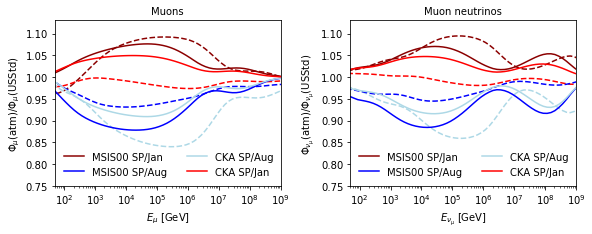

In [12]:
color_spectrum = ['b', 'r', 'g', 'orange', 'cyan', 'violet',
                  'brown', 'pink', 'yellow', 'lightblue']
titles = {('CORSIKA', ('PL_SouthPole', 'January')): 'CKA SP/Jan',
          ('CORSIKA', ('PL_SouthPole', 'August')): 'CKA SP/Aug',
          ('MSIS00', ('SouthPole', 'January')): 'MSIS00 SP/Jan',
          ('MSIS00', ('SouthPole', 'August')): 'MSIS00 SP/Aug',
          ('CORSIKA', ('BK_USStd', None)):'USStd'}

fig = plt.figure(figsize=(8.5, 3.5))
fig.set_tight_layout(dict(rect=[0.01, 0.01, 0.99, 0.97]))
e_grid = mceq_run.y.e_grid

# Define base line
compare_to = (('CORSIKA', ('BK_USStd', None)), 'black')

for theta, atm_tup in mup_dict.keys():
    atm_config, atm_col = atm_tup

    if atm_config[1][0].startswith('BK'):
        continue
    
    mup_comp = mup_dict[(theta, compare_to)]
    numu_comp = numu_dict[(theta, compare_to)]
    nue_comp = nue_dict[(theta, compare_to)]
    
    ls = '--'
    atm_title = '_nolabel_'
    if theta < 90.:
        ls='-'
        atm_title = titles[atm_config]

     
    plt.subplot(121)        
    plt.plot(e_grid, mup_dict[(theta, atm_tup)] / mup_comp, ls=ls, lw=1.5,
             color=atm_col, label=atm_title)
    plt.semilogx()
    plt.xlabel(r"$E_{\mu}$ [GeV]")
    plt.ylim([0.75, 1.1])

    plt.subplot(122)
    plt.plot(e_grid, numu_dict[(theta, atm_tup)] / numu_comp, ls=ls,  lw=1.5,
             color=atm_col, label=atm_title)
    plt.semilogx()
    plt.xlabel(r"$E_{\nu}$ [GeV]")


plt.subplot(121)
plt.title('Muons', fontsize=10)
plt.xlabel(r"$E_{\mu}$ [GeV]")
plt.ylabel(r"$\Phi_{\mu}($atm$)/\Phi_{\mu}($USStd)")
plt.xlim([50,1e9])
plt.ylim([0.75, 1.13])
plt.legend(loc='lower left', ncol=2, frameon=False, fontsize=10)

plt.subplot(122)
plt.title('Muon neutrinos', fontsize=10)
plt.xlabel(r"$E_{\nu_\mu}$ [GeV]")
plt.ylabel(r"$\Phi_{\nu_\mu}($atm$)/\Phi_{\nu_\mu}($USStd)")
plt.xlim([50,1e9])
plt.ylim([0.75, 1.13])
plt.legend(loc='lower left', ncol=2, frameon=False, fontsize=10)
plt.savefig('atm_flux.pdf')